# Generate Simulated Data: Fixed-Plaintext-Dataset-8

In [41]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [42]:
# Define lengh for the data set
data_leng = 1000000
numberOfSamples = 50

# Define key for encryption
key = 23

# Position of the masked and leakage (index starts with 0)
fieldMaskedLekage = 24
fieldMasked = 4
fieldMasked2 = 44
fieldMasked3 = 20

#Random Plaintext
FixedPlaintext = True

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = True

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -5
    jitterRight = 5
else:
    jitterLeft = None
    jitterRight = None

# If masked used True 
maskedValue = True

In [43]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [44]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,1000000,50,23,0.0,5.0,-5,5


In [45]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [46]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
mask = []
mask2 = []
mask3 = []
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))
    
    mask.append(random.randint(0,255))
    mask2.append(random.randint(0,255))
    mask3.append(random.randint(0,255))

print("plaintext:",plaintext[0:5],'\nmask',mask[0:5],'\nmask2',mask2[0:5],'\nmask3',mask2[0:5])

plaintext: [251, 251, 251, 251, 251] 
mask [163, 120, 34, 101, 45] 
mask2 [215, 84, 240, 89, 17] 
mask3 [215, 84, 240, 89, 17]


In [47]:
# Verify size of plaintext
len(plaintext)

1000000

In [48]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [6.541420163634077, 2.7579190352289062, 9.663577721172565, 5.922635756791236, 0.9748126351538753] 
labels: [5, 5, 5, 5, 5]


In [49]:
# Verify size of leakedData 
len(leakedData)

1000000

In [50]:
# Verify size of labels 
len(labels)

1000000

In [51]:
maskedData = []
maskedNoise = []
maskedNoise2 = []
maskedNoise3 = []
maskIndex = 0
for d in plaintext:
    maskedData.append((bin(((AES_Sbox[d^key])^mask[maskIndex]^mask2[maskIndex])).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise.append((bin(mask[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise2.append((bin(mask2[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise3.append((bin(mask3[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskIndex = maskIndex + 1
print("maskedData:",maskedData[0:5],"\nmaskedNoise:",maskedNoise[0:5],"\nmaskedNoise2:",maskedNoise2[0:5],"\nmaskedNoise2:",maskedNoise3[0:5])

maskedData: [0.5726406068761207, 3.2372356280052155, 3.2648956476271844, 7.969114901431776, -1.1079944204841503] 
maskedNoise: [-6.381677125415731, -7.06595216846241, 3.9347993796828704, 1.258954821015438, -0.8797973488890145] 
maskedNoise2: [14.121296897871154, 4.510147246101232, 3.100736842100537, 4.447093011721322, -0.9763579898798409] 
maskedNoise2: [3.1120940306380644, -2.4268214702902915, -1.526281284584953, -2.7509732701333167, -4.200429178246898]


In [52]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace sample at 5th position with the mask and added noise 
        if z == fieldMasked:
            rawData.append(maskedNoise[i])
            
        elif z == fieldMaskedLekage:
            rawData.append(maskedData[i])
            
        elif z == fieldMasked3:
            rawData.append(maskedNoise3[i])
            
        elif z == fieldMasked2:
            rawData.append(maskedNoise2[i])     
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart, noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  deque([-4.451878192820635, 11.950429096046323, -1.3165527745467944, 8.747573731023909, 3.2907205669897577, -6.381677125415731, 3.5930158242939165, 2.3034426015471943, 0.9253868708961628, 8.042472728414069, 4.473842353805923, 3.3518292272246977, 5.445618172388363, 11.45336265191963, 2.8520432376156384, 8.120716854002687, 2.185802640543342, 13.471846592259634, 11.296838116332317, 11.107358936893169, 4.581053077191436, 3.1120940306380644, 0.6918240966960478, -10.384500738528155, 8.287630600742371, 0.5726406068761207, -2.398389865634771, 0.3548361602871255, 7.271351811552168, -2.2488731260070205, 9.978615722697128, -2.495458687384886, 1.9779886746351512, 4.163199517791831, 6.910690825650505, 2.8834357783028812, 6.942131103514302, 8.777375198857763, 5.498019394508299, -3.4215785980120863, 0.9921147197096096, 0.1271434369415485, -0.7369671818698613, 1.96711501218028, -2.7599984705657725, 14.121296897871154, 4.010752167952166, 2.9006923885053606, 8.476573362031404, -2

In [53]:
# Verify size of leakedData 
len(rawTraces)

1000000

## Plot Simulated Data

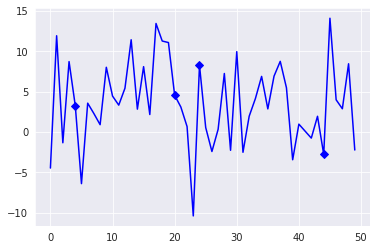

In [54]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[fieldMaskedLekage + randomJitter[0]-1,fieldMasked + randomJitter[0]-1,fieldMasked2 + randomJitter[0]-1,fieldMasked3 + randomJitter[0]-1])

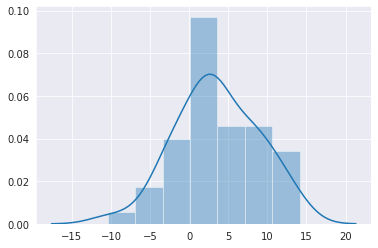

In [55]:
sns.distplot(rawTraces[0])

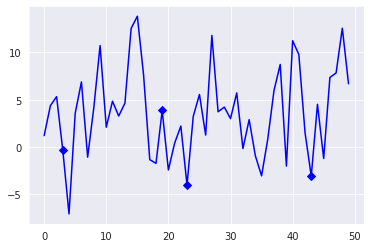

In [56]:
plt.plot(rawTraces[1],'-bD',markevery=[fieldMaskedLekage + randomJitter[1]-1,fieldMasked + randomJitter[1]-1,fieldMasked2 + randomJitter[1]-1,fieldMasked3 + randomJitter[1]-1])

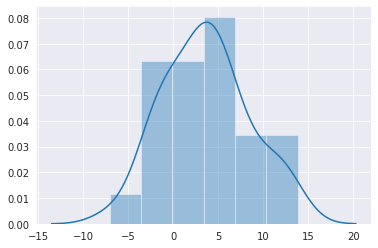

In [57]:
sns.distplot(rawTraces[1])

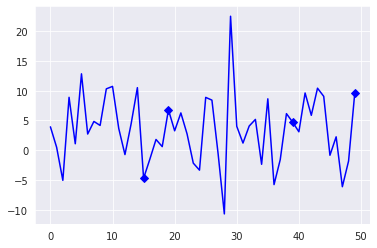

In [58]:
plt.plot(rawTraces[2],'-bD',markevery=[fieldMaskedLekage + randomJitter[2]-1,fieldMasked + randomJitter[2]-1,fieldMasked2 + randomJitter[2]-1,fieldMasked3 + randomJitter[2]-1])

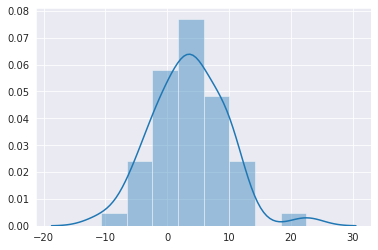

In [59]:
sns.distplot(rawTraces[2])

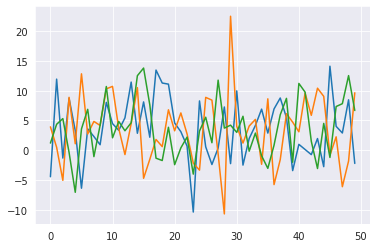

In [60]:
plt.plot(rawTraces[0],'-',rawTraces[2],'-',rawTraces[1],'-',markevery=[24])

### Data Path

In [61]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Tests

In [62]:
class TestNotebook(unittest.TestCase):

    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, True) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, True)
    def test_Mask(self):
        self.assertEqual(maskedValue, True)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'FixedPlaintext')
    
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok
test_Mask (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.003s

OK


In [63]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,-4.451878,11.950429,-1.316553,8.747574,3.290721,-6.381677,3.593016,2.303443,0.925387,8.042473,...,0.127143,-0.736967,1.967115,-2.759998,14.121297,4.010752,2.900692,8.476573,-2.215991,251
1,1.203670,4.363426,5.319732,-0.349020,-7.065952,3.582893,6.876647,-1.073381,4.198622,10.713824,...,9.767032,1.503976,-3.071558,4.510147,-1.213969,7.347885,7.824639,12.542383,6.679583,251
2,3.934799,0.496680,-5.057834,8.894444,1.088558,12.842304,2.725029,4.840924,4.166929,10.317311,...,9.622437,5.868775,10.425855,9.057208,-0.843393,2.254970,-6.126844,-1.811723,9.657684,251
3,4.515789,5.518337,2.904259,4.780769,-2.283620,1.258955,5.226768,-4.538350,5.091298,-1.034452,...,14.984849,-3.176531,3.153261,4.986052,4.447093,9.816175,9.321838,9.700181,12.974693,251
4,-0.879797,3.894652,-11.275087,-4.311564,-0.326873,8.517209,7.907478,12.621164,6.275733,14.608127,...,7.474512,-1.132487,12.035330,-1.003552,11.629280,-1.176626,1.865884,-0.465758,-1.460024,251


### Write Data

In [64]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/TS8_B.csv',index=False)